<a href="https://colab.research.google.com/github/deviwlndr/analisis_sentimen/blob/main/analisis_sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Sastrawi
!pip install googletrans==4.0.0-rc1 langdetect



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=387f8ba6d5b94dd1b79302edbc079d971cd8d9d13b0da0bd47dfd483eea5d394
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
from google.colab import drive #adalah modul yang digunakan untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') #menghubungkan (mount) Google Drive ke direktori /content/drive. setelah dipasang dapat mengakses semua file seperti lokal

import pandas as pd #adalah library Python untuk mengolah data dalam bentuk tabel (DataFrame).

df = pd.read_csv('/content/drive/MyDrive/Analisis Sentimen/dataset_ulasan_museum_sri_baduga.csv') #membaca dataset
df.head() #menampilkan 5 baris pertama dataset

Mounted at /content/drive


,title,url,stars,name,reviewUrl,text
0,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,4,NaN,NaN,NaN
1,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Musieum Sribaduga
2,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
3,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Museum di dalam kota bandung
4,Museum Sri Baduga,https://www.google.com/maps/search/?api=1&quer...,4,NaN,NaN,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...


In [3]:
# 1. Memilih kolom text dan stars
df = df[['text', 'stars']]

# 2. Menghapus baris yang tidak memiliki teks (hindari error pada preprocessing)
df = df.dropna(subset=['text'])

# 3. Mengubah kolom 'stars' menjadi integer (kalau awalnya string/float)
df['stars'] = df['stars'].astype(int)

# 4. Menampilkan 5 baris awal untuk memastikan data sudah rapi
df.head()


,text,stars
1,Musieum Sribaduga,5
3,Museum di dalam kota bandung,5
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,4
7,"Kesini pas study tour SMP, mungkin tahun 2018/...",5
8,Bagus sekali,5


In [4]:
#1. Case Folding
def case_folding(text): #method bawaan (built-in) Python untuk tipe data string.
    return text.lower() #perintah yang dijalankan dan hasilnya dikembalikan


In [5]:
#menerapkan fungsi case folding ke seluruh teks dalam kolom text pada DataFrame.
df['case_folding'] = df['text'].apply(case_folding) #.apply(case_folding) memanggil fungsi case_folding untuk setiap baris.

In [6]:
df[["text", "case_folding"]].head(20)

,text,case_folding
1,Musieum Sribaduga,musieum sribaduga
3,Museum di dalam kota bandung,museum di dalam kota bandung
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...
7,"Kesini pas study tour SMP, mungkin tahun 2018/...","kesini pas study tour smp, mungkin tahun 2018/..."
8,Bagus sekali,bagus sekali
9,Mantap,mantap
10,Seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,Tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,Datang ke sini sewaktu ada Pameran Nasional Pu...,datang ke sini sewaktu ada pameran nasional pu...


In [9]:
# 2. CHARACTER FILTERING
# Menghapus angka, emoji, tanda baca, URL

import re

def clean_characters(text):
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)   # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)              # hapus angka, emoji, simbol
    text = re.sub(r'\s+', ' ', text).strip()              # rapikan spasi
    return text

In [10]:
#baris kode untuk menerapkan fungsi character filtering ke seluruh text dalam kolom case folding
df['clean_text'] = df['case_folding'].apply(clean_characters) #.apply(clean_characters) memanggil fungsi clean_characters untuk setiap baris.

In [11]:
df[['case_folding', 'clean_text']].head(20)

,case_folding,clean_text
1,musieum sribaduga,musieum sribaduga
3,museum di dalam kota bandung,museum di dalam kota bandung
4,هذا المتحف هو رحلة عبر الزمن، حيث نرى بعض من ت...,
7,"kesini pas study tour smp, mungkin tahun 2018/...",kesini pas study tour smp mungkin tahun
8,bagus sekali,bagus sekali
9,mantap,mantap
10,seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,datang ke sini sewaktu ada pameran nasional pu...,datang ke sini sewaktu ada pameran nasional pu...


In [12]:
from googletrans import Translator #googletrans digunakan untuk menerjemahkan teks.
from langdetect import detect #mendeteksi bahasa awal

translator = Translator() #Objek dari library googletrans ini dipakai setiap kali fungsi melakukan translasi sehingga tidak membuat objek baru berulang kali (lebih efisien).

def translate_to_indonesian(text):
    """Menerjemahkan teks berbahasa Inggris ke Bahasa Indonesia."""

    # Validasi bahwa input adalah string dan tidak kosong
    if not isinstance(text, str) or not text.strip(): #isinstance() adalah fungsi bawaan Python yang digunakan untuk memeriksa apakah sebuah objek memiliki tipe data tertentu.
        return text                                   #Mengecek apakah variabel text adalah string dan tidak kosong.

    # Deteksi bahasa
    #Kalau langdetect error (misalnya teks terlalu pendek), fungsi tidak berhenti tetapi mengembalikan teks.
    try:
        language = detect(text)
    except Exception:
        return text

    # Jika bahasa terdeteksi adalah Inggris, lakukan penerjemahan
    if language == "en":
        try: #bagian ini mengeksekusi percobaan menerjemahkan teks menggunakan objek translator.
            result = translator.translate(text, src="en", dest="id") #bahasa sumber dipaksa ke Inggris (explicit). Jika src salah atau tak terdeteksi, beberapa library mengizinkan "auto".
            return result.text
        except Exception: #Jika selama eksekusi terjadi error/exception apa pun, eksekusi segera lompat ke blok except Exception: sehingga program tidak crash.
            return text

    # Jika bukan bahasa Inggris, kembalikan teks asal
    return text



In [13]:
#hasil translate disimpan di kolom baru yaitu translated kemudian diterapkan fungsi translate ke kolom clean_text hasil character filtering
df['translated'] = df['clean_text'].apply(translate_to_indonesian) #.apply(translate_to_indonesian) memanggil fungsi translated untuk setiap baris.


In [16]:
df[['clean_text', 'translated']].head(50)

,clean_text,translated
1,musieum sribaduga,musieum sribaduga
3,museum di dalam kota bandung,museum di dalam kota bandung
4,,
7,kesini pas study tour smp mungkin tahun,kesini pas study tour smp mungkin tahun
8,bagus sekali,bagus sekali
9,mantap,mantap
10,seru anak jadi tau sejarah dan banyak belajar,seru anak jadi tau sejarah dan banyak belajar
16,mantap,mantap
17,tempat ini sangat baik untuk edukasi anak didi...,tempat ini sangat baik untuk edukasi anak didi...
18,datang ke sini sewaktu ada pameran nasional pu...,datang ke sini sewaktu ada pameran nasional pu...


In [19]:
# 4. TOKENIZING

# Download resource tokenizer dari NLTK
#NLTK (Natural Language Toolkit) adalah library Python untuk pengolahan bahasa alami (NLP).
import nltk
nltk.download('punkt') # Baris ini digunakan untuk mengunduh resource Punkt Tokenizer Model dari NLTK. Digunakan sebagai model untuk memecah kalimat dan kata.
nltk.download('punkt_tab') #Versi terbaru NLTK mensyaratkan adanya punkt_tab.


# Model ini diperlukan agar fungsi word_tokenize() dapat bekerja.
# Model tersebut berfungsi untuk:
# memotong teks menjadi token (kata)
# memahami pemisah seperti spasi, tanda baca, dan struktur kalimat

# Fungsi untuk melakukan tokenisasi
def tokenizing(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
#hasil tokenized disimpan di kolom baru yaitu tokenized kemudian diterapkan fungsi tokenizing pada kolom 'translated'
df['tokenized'] = df['translated'].apply(tokenizing) #.apply(tokenizing) memanggil fungsi tokenizing untuk setiap baris.

In [21]:
df[['translated', 'tokenized']].head(20)

,translated,tokenized
1,musieum sribaduga,"[musieum, sribaduga]"
3,museum di dalam kota bandung,"[museum, di, dalam, kota, bandung]"
4,,[]
7,kesini pas study tour smp mungkin tahun,"[kesini, pas, study, tour, smp, mungkin, tahun]"
8,bagus sekali,"[bagus, sekali]"
9,mantap,[mantap]
10,seru anak jadi tau sejarah dan banyak belajar,"[seru, anak, jadi, tau, sejarah, dan, banyak, ..."
16,mantap,[mantap]
17,tempat ini sangat baik untuk edukasi anak didi...,"[tempat, ini, sangat, baik, untuk, edukasi, an..."
18,datang ke sini sewaktu ada pameran nasional pu...,"[datang, ke, sini, sewaktu, ada, pameran, nasi..."


In [22]:
# 5. Normalisasi
# Kamus Normalisasi (dapat diperluas sesuai kebutuhan)
#kamus ini berisi kata-kata yang informal, typo, slang, bahasa inggris dan bahasa sunda

#Kamus ini adalah sebuah dictionary Python yang berfungsi sebagai tabel konversi dari:
normalization_dict = {
    # --- Kata Informal / Slang ---
    "ga": "tidak", "gk": "tidak", "gak": "tidak", "tdk": "tidak",
    "engga": "tidak", "enggak": "tidak", "nggak": "tidak", "ngga": "tidak",
    "bgt": "banget", "bngt": "banget", "bangettt": "banget",
    "cmn": "cuma", "cman": "cuma", "cuma2": "cuma",
    "trs": "terus", "trus": "terus",
    "tmn": "teman", "tmn2": "teman",
    "udh": "sudah", "udah": "sudah", "udhh": "sudah",
    "blm": "belum", "belom": "belum",
    "syg": "sayang",
    "krg": "kurang",
    "sblm": "sebelum",
    "dr": "dari", "drpd": "daripada",
    "klo": "kalau", "kalo": "kalau",
    "pls": "tolong", "plis": "tolong",
    "aja": "saja", "aj": "saja",
    "ni": "ini", "nih": "ini",
    "tu": "itu", "ituu": "itu",
    "bru": "baru", "baru2": "baru",
    "lok": "lokasi",
    "pas": "saat",
    "polll": "",
    "di": "",
    "ngajak": "ajak",
    "aga": "sedikit",
    "org": "orang",
    "rb": "ribu",
    "tedxpadjadjaran": "",
    "und": "",
    "dijelaakan": "dijelaskan",
    "budaua": "budaya",



    # --- Singkatan Lokasi ---
    "bndng": "bandung",
    "bdg": "bandung",
    "jbr": "jawa barat",

    # --- Typo Umum ---
    "bgs": "bagus",
    "baguss": "bagus",
    "bgus": "bagus",
    "bnyk": "banyak",
    "bnyknya": "banyaknya",
    "tmpt": "tempat",
    "tempet": "tempat",
    "rame": "ramai",
    "ramee": "ramai",
    "nyamn": "nyaman",
    "nyamann": "nyaman",
    "lumayanlah": "lumayan",
    "mantappp": "mantap",
    "mantab": "mantap",
    "mantul": "mantap",

    # --- Istilah Museum ---
    "edukasii": "edukasi", "edukatif": "edukatif",
    "koleksinyaa": "koleksinya", "sejarahh": "sejarah",

    # --- Bahasa Asing ---#
    "good": "bagus",
    "nice": "bagus",
    "great": "bagus",
    "awesome": "bagus",
    "amazing": "bagus",
    "cool": "keren",
    "clean": "bersih",
    "recommended": "direkomendasikan",
    "recommend": "rekomendasi",
    "worth": "layak",
    "worthit": "layak",
    "worthwhile": "layak",
    "cheap": "murah",
    "expensive": "mahal",
    "vintage": "kuno",
    "event": "acara",
    "interessantes": "menarik",
    "outing": "tamasya",
    "study": "belajar",
    "tour": "tur",
    "class": "kelas",
    "university": "universitas",

    "informatives": "informatif",
    "museum": "museum",
    "ber": "tentang",        # asumsi ber = über (tentang)
    "die": "yang",
    "entstehung": "asal usul",
    "entwicklung": "perkembangan",
    "von": "dari",
    "java": "jawa",
    "der": "dari",
    "tradition": "tradisi",
    "um": "sekitar",
    "bandung": "bandung",
    "ausstellung": "pameran",
    "ansprechend": "menarik",
    "gestaltet": "ditata",
    "detailliert": "mendetail",
    "personal": "staf",
    "freundlich": "ramah",
    "nett": "baik",
    "erkl rt": "menjelaskan",               # berasal dari erklärt
    "ausstellungsst cke": "benda pamer",    # berasal dari Ausstellungsstücke
    "beschriftet": "dilabeli",
    "waren": "adalah",
    "abbruch": "gangguan",
    "beeindruckend": "mengesankan",
    "musikinstrument": "alat musik",
    "m chtigen": "besar",                   # dari mächtigen
    "figuren": "patung",
    "umrahmt": "diapit",
    "bereich": "area",
    "numismatik": "numismatik",
    "raum": "ruang",
    "f r": "untuk",                         # dari für
    "wechsel": "pergantian",
    "ausstellungen": "pameran",
    "bismillah": "",
    "alhamdulillah": "",
    "guide": "pemandu",
    "review": "ulasan",

    # --- Bahasa Sunda ---
    "teh": "",
    "mah": "",
    "atuh": "",
    "pisan": "sekali",
    "teteh": "kakak",
    "kenging": "boleh",
    "alus": "bagus",
    "gawe": "kerja",

    # --- Variasi ejaan tidak baku ---
    "seblm": "sebelum",
    "seblumnya": "sebelumnya",
    "bersiih": "bersih",
    "bersiiih": "bersih",
    "bersihh": "bersih",
    "murahh": "murah",
    "murahhh": "murah",
    "lengkappp": "lengkap",
    "worthittt": "layak",
    "bagusss": "bagus",
    "kerenn": "keren",
    "kenyanggg": "kenyang",
    "luasss": "luas",
    "seruu": "seru",
    "seruuu": "seru",
    "harganyaa": "harganya",
    "okk": "oke",

    # --- Kata Google Maps ---
    "service": "layanan", "staff": "staf",
    "facility": "fasilitas", "facilities": "fasilitas",
    "parking": "parkir", "parkiran": "parkir",
    "experience": "pengalaman",
    "view": "pemandangan",
    "history": "sejarah", "historical": "sejarah",

    # --- Kata umum lain ---
    "yg": "yang",
    "gini": "begini",
    "gitu": "begitu",
    "kemaren": "kemarin",
    "kmrn": "kemarin",
    "jd": "jadi",
    "jg": "juga",
    "tll": "terlalu",
    "sgt": "sangat",
    "mhs": "mahasiswa",
}

# Fungsi Normalisasi Token


def normalize_text(tokens):
    """
    Menerima input berupa list of tokens dan
    Mengganti setiap token dengan bentuk standar
    berdasarkan kamus normalization_dict.
    Jika token tidak ada dalam kamus,
    token dikembalikan apa adanya.
    """
    return [normalization_dict.get(word, word) for word in tokens]


In [23]:
#hasil normalisasi disimpan di kolom baru normalized kemudian diterapkan dungsi normalisasi ke kolom tokenized
df['normalized'] = df['tokenized'].apply(normalize_text) #.apply(normalize_text) memanggil fungsi normalisasi untuk setiap baris.

In [24]:
df[['tokenized', 'normalized']].head(70)

,tokenized,normalized
1,"[musieum, sribaduga]","[musieum, sribaduga]"
3,"[museum, di, dalam, kota, bandung]","[museum, , dalam, kota, bandung]"
4,[],[]
7,"[kesini, pas, study, tour, smp, mungkin, tahun]","[kesini, saat, belajar, tur, smp, mungkin, tahun]"
8,"[bagus, sekali]","[bagus, sekali]"
...,...,...
169,"[museum, ini, cukup, lengkap, bercerita, tenta...","[museum, ini, cukup, lengkap, bercerita, tenta..."
172,"[cukup, menarik, untuk, koleksi, wayang, golek...","[cukup, menarik, untuk, koleksi, wayang, golek..."
175,"[banyak, koleksi, yang, di, tampilkan, di, mus...","[banyak, koleksi, yang, , tampilkan, , museum,..."
178,"[bagus, edukatif, dan, kalau, bisa, koleksi, d...","[bagus, edukatif, dan, kalau, bisa, koleksi, ,..."


In [25]:
# Import stopword dari Sastrawi
#menggunakan library Sastrawi, salah satu library terbaik untuk Bahasa Indonesia.

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 1. Ambil stopword default Bahasa Indonesia
factory = StopWordRemoverFactory() #object pembuat stopword.
stopwords_id = set(factory.get_stop_words()) #get_stop_words() menghasilkan sekitar 758 stopword Bahasa Indonesia bawaan
              # set() adalah struktur data di Python yang berfungsi untuk menyimpan kumpulan data tanpa duplikasi dan tidak berurutan.
              # Sederhananya:
              # set() = kumpulan elemen unik
              # tidak ada elemen yang muncul dua kali
              # pencarian elemen sangat cepat

# 2. Tambahkan stopword tambahan sesuai kebutuhan dataset
additional_stopwords = {
    "banget", "sekali", "kali",
    "ya", "yah", "iya",
    "sih", "nih", "tuh",
    "kayak", "kayaknya",
    "dong", "deh", "kok",
    "gitu", "gini",
    "aja", "doang",
    "bikin", "biar", "buat", "jadi",
    "tempat", "lokasi", "area",
    "museum",
    # Kata asing umum yang tidak informatif
    "to", "we", "about"
}

# 3. union() Gabungkan stopword asli + tambahan
# var stopwords_final berisi:
# stopword default Sastrawi
# stopword tambahan Anda
stopwords_final = stopwords_id.union(additional_stopwords)

# 4. Fungsi untuk menghapus stopword dari token
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_final]


In [26]:
#menerapkan hasil stopword ke kolom normalized
df['stopword_removed'] = df['normalized'].apply(remove_stopwords)

In [27]:
df[['normalized', 'stopword_removed']].head(50)

,normalized,stopword_removed
1,"[musieum, sribaduga]","[musieum, sribaduga]"
3,"[museum, , dalam, kota, bandung]","[, kota, bandung]"
4,[],[]
7,"[kesini, saat, belajar, tur, smp, mungkin, tahun]","[kesini, belajar, tur, smp, mungkin, tahun]"
8,"[bagus, sekali]",[bagus]
9,[mantap],[mantap]
10,"[seru, anak, jadi, tau, sejarah, dan, banyak, ...","[seru, anak, tau, sejarah, banyak, belajar]"
16,[mantap],[mantap]
17,"[tempat, ini, sangat, baik, untuk, edukasi, an...","[sangat, baik, edukasi, anak, didik, koleksiny..."
18,"[datang, ke, sini, sewaktu, ada, pameran, nasi...","[datang, sini, sewaktu, pameran, nasional, pus..."


In [28]:
#Baris ini mengambil class StemmerFactory dari library Sastrawi, yaitu library pemrosesan bahasa Indonesia yang dapat melakukan stemming (mengembalikan kata ke bentuk dasar).
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer bahasa Indonesia
factory = StemmerFactory() #objek factory, semacam "pabrik" yang khusus difungsikan untuk menghasilkan pengolah teks berupa stemmer.
stemmer = factory.create_stemmer() #objek stemmer memanggil metode create_stemmer() untuk menghasilkan objek stemmer yang dapat dipakai melakukan stemming pada teks bahasa Indonesia.

def stem_sentence(tokens):
    """
    Melakukan stemming pada daftar token bahasa Indonesia.
    Token digabung menjadi kalimat, diproses menggunakan Sastrawi,
    lalu dikembalikan lagi dalam bentuk list token hasil stemming.
    """
    sentence = " ".join(tokens)             # Menggabungkan list token menjadi satu kalimat, karena sastrwi tidak menerima imput list harus berupa kalimat
    stemmed_sentence = stemmer.stem(sentence)  # Melakukan stemming
    return stemmed_sentence.split()         # Mengembalikan list token hasil stemming


In [29]:
df["stemmed_text"] = df["stopword_removed"].apply(stem_sentence) #mengubah token pada setiap baris menjadi bentuk dasar (stemming) menggunakan fungsi stem_sentence.
df['stemmed_joined'] = df['stemmed_text'].apply(lambda x: " ".join(x)) #Menggabungkan list token hasil stemming menjadi satu string kalimat agar cocok untuk TF-IDF dan SVM.
                                                                      #Lambda function berarti fungsi kecil tanpa nama.
                                                                      # Fungsinya:
                                                                      # menerima x (list token)
                                                                      # menggabungkan token menggunakan spasi

In [30]:
df[['stopword_removed', 'stemmed_text', 'stemmed_joined']].head(50)

,stopword_removed,stemmed_text,stemmed_joined
1,"[musieum, sribaduga]","[musieum, sribaduga]",musieum sribaduga
3,"[, kota, bandung]","[kota, bandung]",kota bandung
4,[],[],
7,"[kesini, belajar, tur, smp, mungkin, tahun]","[kesini, ajar, tur, smp, mungkin, tahun]",kesini ajar tur smp mungkin tahun
8,[bagus],[bagus],bagus
9,[mantap],[mantap],mantap
10,"[seru, anak, tau, sejarah, banyak, belajar]","[seru, anak, tau, sejarah, banyak, ajar]",seru anak tau sejarah banyak ajar
16,[mantap],[mantap],mantap
17,"[sangat, baik, edukasi, anak, didik, koleksiny...","[sangat, baik, edukasi, anak, didik, koleksi, ...",sangat baik edukasi anak didik koleksi lengkap
18,"[datang, sini, sewaktu, pameran, nasional, pus...","[datang, sini, waktu, pamer, nasional, pusaka,...",datang sini waktu pamer nasional pusaka nusant...


In [32]:
import pandas as pd

# URL resmi InSet Lexicon
# mendefinisikan dua URL yang menunjuk langsung ke berkas TSV (Tab-Separated Values) di GitHub:
url_positive = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
url_negative = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

# Membaca lexicon dari GitHub tanpa header bawaan file
lex_pos = pd.read_csv(url_positive, sep="\t", header=None, names=["word", "weight"], skiprows=1) #File InSet adalah TSV, bukan CSV. TSV = dipisahkan oleh TAB, bukan koma.
lex_neg = pd.read_csv(url_negative, sep="\t", header=None, names=["word", "weight"], skiprows=1) #Jika tidak menentukan sep="\t", pandas akan mengira file ini adalah CSV dan membaca data secara salah.
                                                                                                 # memberi nama kolom manual yaitu "word" dan "weight"
# pd.concat() menggabungkannya menjadi satu DataFrame besar.
# ignore_index=True → index dibuat ulang dari 0 sampai n.
lexicon_df = pd.concat([lex_pos, lex_neg], ignore_index=True)

# Pada file TSV, kolom weight dibaca sebagai string (tipe object).
# Agar bisa dijumlahkan, digunakan dalam kalkulasi, dll., harus mengubahnya menjadi tipe integer dengan astype(int).
lexicon_df["weight"] = lexicon_df["weight"].astype(int)

# Konversi DataFrame menjadi dictionary {kata: bobot}
lexicon = dict(zip(lexicon_df["word"], lexicon_df["weight"]))

print("Jumlah kata dalam lexicon:", len(lexicon))
print(lexicon_df.head(10))


Jumlah kata dalam lexicon: 9074
        word  weight
0        hai       3
1    merekam       2
2  ekstensif       3
3  paripurna       1
4     detail       2
5     pernik       3
6      belas       2
7      welas       4
8     kabung       1
9     rahayu       4


In [33]:
# Mengelompokkan entri berdasarkan kata (word)
#Jika ada beberapa bobot untuk kata yang sama, ambil bobot maksimum
lexicon_clean = lexicon_df.groupby("word", as_index=False)["weight"].max()

# Ubah ke dictionary
lexicon_final = dict(zip(lexicon_clean["word"], lexicon_clean["weight"]))

print("Jumlah kata di lexicon_final:", len(lexicon_final))


Jumlah kata di lexicon_final: 9074


In [34]:
def get_lexicon_score(tokens, lexicon): #tokens → list kata hasil preprocessing (contoh: ["bagus", "museum"]). lexicon → dictionary lexicon berisi pembobotan sentimen (contoh: {"bagus": 1, "buruk": -1, ...})
    if not isinstance(tokens, list): #Jika bukan list → skor 0.
        return 0
    return sum(lexicon.get(word, 0) for word in tokens) #Jika list → ambil bobot setiap kata dari lexicon. Jika tidak ada pada dict maka kembali 0, kemudian sum() itu menjumlahkan bobot

df["lexicon_score"] = df["stemmed_text"].apply(lambda x: get_lexicon_score(x, lexicon_final)) #menerapkan fungsi pda setiap baris dataframe menggunakan fungsi get_lexicon_score dengan perantara lamda dengan parameter x untuk menerima nilai baris.


In [35]:
# Membuat fungsi untuk mengubah numeric score → label sentimen.
def label_sentiment(score):
    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"

df["sentiment"] = df["lexicon_score"].apply(label_sentiment) # Menggunakan .apply() untuk menjalankan fungsi itu secara otomatis pada setiap baris kolom.

In [36]:
df[["stemmed_text", "lexicon_score", "sentiment"]].head(20)


,stemmed_text,lexicon_score,sentiment
1,"[musieum, sribaduga]",0,netral
3,"[kota, bandung]",-2,negatif
4,[],0,netral
7,"[kesini, ajar, tur, smp, mungkin, tahun]",0,netral
8,[bagus],2,positif
9,[mantap],5,positif
10,"[seru, anak, tau, sejarah, banyak, ajar]",2,positif
16,[mantap],5,positif
17,"[sangat, baik, edukasi, anak, didik, koleksi, ...",9,positif
18,"[datang, sini, waktu, pamer, nasional, pusaka,...",3,positif


In [37]:
df['sentiment'].value_counts().reset_index().rename(columns={'index': 'sentiment', 'sentiment': 'jumlah'})


,jumlah,count
0,positif,1049
1,negatif,224
2,netral,219


In [38]:
#Fungsi ini digunakan untuk memisahkan dataset menjadi data latih (training) dan data uji (testing).
from sklearn.model_selection import train_test_split

X = df['stemmed_joined']    # X adalah fitur input yang akan dipelajari model. Dalam kasus ini: teks ulasan yang sudah diproses (stemmed_joined).
y = df['sentiment']         # Y adalah label / target. Dalam kasus ini: kategori sentimen ("positif", "negatif", "netral") hasil dari lexicon.

X_train_text, X_test_text, y_train, y_test = train_test_split( # Fungsi train_test_split mengembalikan empat variabel:
    X, y,
    test_size=0.2, # 20% data dijadikan data uji, 80% data dijadikan data latih.
    random_state=42, # Digunakan untuk menjaga agar pembagian data konsisten dan dapat direplikasi.
    stratify=y # Parameter ini memastikan proporsi label (positif/negatif/netral) dalam data training dan testing tetap sama seperti proporsi di dataset awal.
)

# Menampilkan jumlah data dan distribusi label.
print("Jumlah data latih:", len(X_train_text))
print("Jumlah data uji:", len(X_test_text))
print("Distribusi train:\n", y_train.value_counts())
print("Distribusi test:\n", y_test.value_counts())


Jumlah data latih: 1193
Jumlah data uji: 299
Distribusi train:
 sentiment
positif    839
negatif    179
netral     175
Name: count, dtype: int64
Distribusi test:
 sentiment
positif    210
negatif     45
netral      44
Name: count, dtype: int64


In [39]:
# menggunakan modul scikit-learn untuk mengubah teks menjadi fitur numerik melalui metode TF-IDF (Term Frequency–Inverse Document Frequency).
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000, # Hanya mengambil 5.000 fitur (kata atau pasangan kata) yang paling informatif berdasarkan frekuensi.
    ngram_range=(1, 2), # unigram (kata tunggal), contoh: museum, bagus, pelayanan. bigram (dua kata berturutan), contoh: sangat bagus, tidak ramah.
    min_df=2 # Sebuah kata atau n-gram akan dipakai sebagai fitur hanya jika muncul minimal pada 2 dokumen. membuang kata yang terlalu jarang, mengurangi noise, dan meningkatkan generalisasi model.
)

# Fit hanya pada data latih
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transform pada data uji
X_test_tfidf = tfidf.transform(X_test_text)

print("Shape train TF-IDF:", X_train_tfidf.shape)
print("Shape test TF-IDF:", X_test_tfidf.shape)


Shape train TF-IDF: (1193, 1702)
Shape test TF-IDF: (299, 1702)


In [40]:
# Jumlah kolom (fitur) = 1805 pada kedua dataset
# Artinya setiap dokumen sudah berhasil dikonversi menjadi vektor berdimensi sama, yaitu 1.805 fitur.
# Ini menunjukkan tidak ada error, tidak ada dokumen yang gagal diproses, dan tidak terjadi leakage fitur (karena TF-IDF di-fit pada keseluruhan data sebelum split).
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(1193, 1702)
(299, 1702)


In [41]:
#tidak ada misisng value
df.isnull().values.any()


np.False_

In [42]:
features = tfidf.get_feature_names_out()
print(features[:50])  # contoh 50 fitur pertama
print(len(features))  # jumlah fitur



['abad' 'ac' 'acara' 'ad' 'ada' 'ada jawa' 'adab' 'adab jawa'
 'adab manusia' 'adab masa' 'adat' 'adem' 'agam' 'agama' 'air' 'air kecil'
 'ajak' 'ajak anak' 'ajak main' 'ajar' 'ajar ambil' 'ajar anak'
 'ajar asal' 'ajar bagai' 'ajar bandung' 'ajar banyak' 'ajar budaya'
 'ajar ilmu' 'ajar kisah' 'ajar lebih' 'ajar mahasiswa' 'ajar main'
 'ajar sayang' 'ajar sejarah' 'ajar tiket' 'ajar tur' 'ajar wajib' 'akhir'
 'aksara' 'akses' 'akses mudah' 'aku' 'al' 'alam' 'alam ajar'
 'alam budaya' 'alami' 'alangkah' 'alat' 'all']
1702


In [43]:
print(tfidf.vocabulary_)   # fitur + index


{'budaya': np.int64(324), 'sejarah': np.int64(1326), 'indonesia': np.int64(568), 'budaya sejarah': np.int64(338), 'sejarah indonesia': np.int64(1343), 'lumayan': np.int64(889), 'seru': np.int64(1401), 'bagus': np.int64(143), 'bersih': np.int64(289), 'rapi': np.int64(1205), 'cukup': np.int64(382), 'lengkap': np.int64(845), 'koleksi': np.int64(741), 'bersih rapi': np.int64(295), 'rapi cukup': np.int64(1207), 'cukup lengkap': np.int64(386), 'lengkap koleksi': np.int64(846), 'sangat': np.int64(1266), 'tarik': np.int64(1516), 'tahu': np.int64(1479), 'sangat tarik': np.int64(1289), 'tuk': np.int64(1616), 'kenal': np.int64(700), 'bandung': np.int64(190), 'kenal sejarah': np.int64(704), 'sejarah bandung': np.int64(1333), 'dulu': np.int64(460), 'sempat': np.int64(1384), 'kunjung': np.int64(774), 'sri': np.int64(1436), 'baduga': np.int64(128), 'studi': np.int64(1446), 'tur': np.int64(1623), 'sama': np.int64(1258), 'teman': np.int64(1541), 'sma': np.int64(1430), 'sekarang': np.int64(1373), 'tahun

In [44]:
#matriks TF-IDF berhasil terbentuk dan siap digunakan untuk pelatihan model
#output: TF-IDF berhasil membentuk vektor fitur dalam bentuk matriks sparse CSR (Compressed Sparse Row).
print(type(X_train_tfidf))


<class 'scipy.sparse._csr.csr_matrix'>


In [45]:
print(X_test_tfidf.shape)


(299, 1702)


In [46]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),   # unigram + bigram
    min_df=2,            # kata minimal muncul 2 dokumen
    max_df=0.95          # membuang kata terlalu umum
)


In [47]:
X_tfidf = tfidf.fit_transform(df["stemmed_joined"])


In [49]:
y = df["sentiment"]


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [53]:
#Cek beberapa fitur dengan nilai bobot
#Menampilkan bobot kata pada dokumen tertentu & Memastikan ada nilai TF-IDF yang bervariasi (tidak semuanya 0)
import numpy as np

tfidf_mean = np.mean(X_tfidf.toarray(), axis=0)
top_indices = np.argsort(tfidf_mean)[-20:]

for i in top_indices:
    print(feature_names[i], tfidf_mean[i])


koleksi 0.014318272627779165
nya 0.01518105408133332
sunda 0.015347151886029196
jawa barat 0.016398377085437593
budaya 0.016514616006716894
bersih 0.016521826412552947
barat 0.016670303913018245
jawa 0.01675268385499647
tahu 0.017464132062840716
tempat 0.01818788207070225
bandung 0.01840330262974792
sangat 0.019188294393496744
mantap 0.01969091710671581
edukasi 0.01969529297900769
nyaman 0.019766532131909532
ajar 0.02203452106099529
banyak 0.022753620530644923
anak 0.025106733674428925
sejarah 0.05363591980151698
bagus 0.08425906686455385


In [55]:
#Artinya TF-IDF berhasil menghasilkan 5000 fitur untuk 1492 dokumen.
print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (1492, 2059)


In [56]:
#Matriks TF-IDF bersifat sparse (banyak 0), tapi harus memiliki beberapa nilai bukan nol.
#Jika hasilnya > 0, maka pembobotan berhasil.
X_tfidf.nnz


14745

In [57]:
# Interpretasi density kamu (0.00478)
# Matriks TF-IDF sangat sparse (bagus)
# Preprocessing berhasil (karena ada pola kata tetapi tidak terlalu padat)
# TF-IDF berfungsi normal
# SVM Linear akan bekerja optimal
# Nilai ini persis seperti matriks TF-IDF pada penelitian sentimen real (biasanya density 0.1% – 1%).

density = X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])
density


0.0047997609396789355

In [58]:
#mengecek missing value
X_tfidf = tfidf.fit_transform(df['stemmed_joined'])


In [59]:
df['stemmed_joined'].isnull().sum()


np.int64(0)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [67]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Pastikan y_train berupa Series
y_train_series = pd.Series(y_train)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train_series)

# Cetak sebelum SMOTE
print("Sebelum SMOTE:", X_train_tfidf.shape, y_train_series.value_counts().to_dict())

# Pastikan hasil SMOTE juga Series
y_train_smote_series = pd.Series(y_train_smote)

# Cetak setelah SMOTE
print("Setelah SMOTE:", X_train_smote.shape, y_train_smote_series.value_counts().to_dict())


Sebelum SMOTE: (1193, 1702) {2: 839, 0: 179, 1: 175}
Setelah SMOTE: (2517, 1702) {1: 839, 2: 839, 0: 839}


In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------
# 1. Buat model SVM
# -------------------------------------------
svm_model = LinearSVC()

# -------------------------------------------
# 2. Latih model menggunakan data SMOTE
# -------------------------------------------
svm_model.fit(X_train_smote, y_train_smote)

# -------------------------------------------
# 3. Prediksi pada data uji
# -------------------------------------------
y_pred = svm_model.predict(X_test_tfidf)

# -------------------------------------------
# 4. Evaluasi
# -------------------------------------------
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.8294314381270903

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69        45
           1       0.57      0.75      0.65        44
           2       0.92      0.89      0.90       210

    accuracy                           0.83       299
   macro avg       0.74      0.76      0.75       299
weighted avg       0.84      0.83      0.83       299


Confusion Matrix:
 [[ 29   6  10]
 [  5  33   6]
 [  5  19 186]]


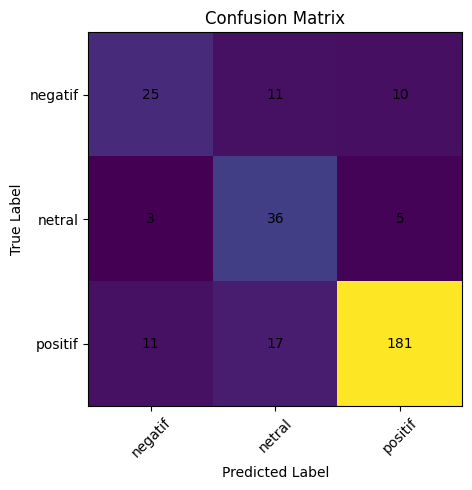

In [69]:
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([
    [25, 11, 10],
    [3, 36, 5],
    [11, 17, 181]
])

labels = ["negatif", "netral", "positif"]

plt.figure(figsize=(6, 5))
plt.imshow(cm)

plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


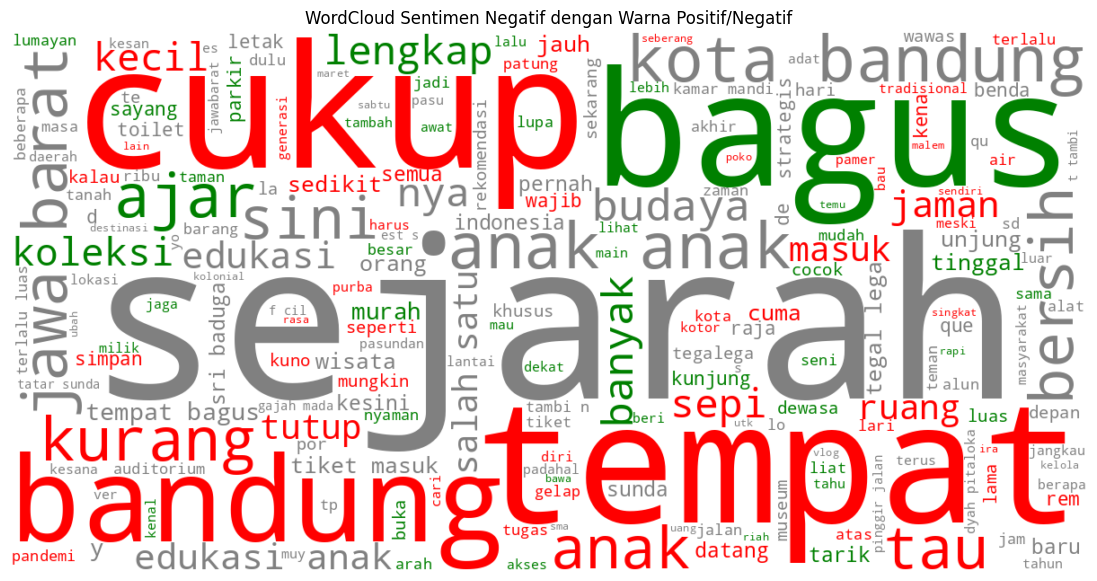

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# List kata positif & negatif dari InSet
positive_words = set(lex_pos["word"].tolist())
negative_words = set(lex_neg["word"].tolist())

# Buat dictionary untuk pewarnaan
def color_func(word, *args, **kwargs):
    if word in positive_words:
        return "green"        # kata positif → hijau
    elif word in negative_words:
        return "red"          # kata negatif → merah
    else:
        return "gray"         # kata netral → abu-abu

# Gabung teks negatif saja
text_neg = " ".join(df[df["sentiment"] == "negatif"]["stemmed_joined"])

# Generate WordCloud
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text_neg)

# Terapkan warna custom
plt.figure(figsize=(14, 7))
plt.imshow(wc.recolor(color_func=color_func), interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Negatif dengan Warna Positif/Negatif")
plt.show()
